In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000183257C9400>,
      dtype=object)

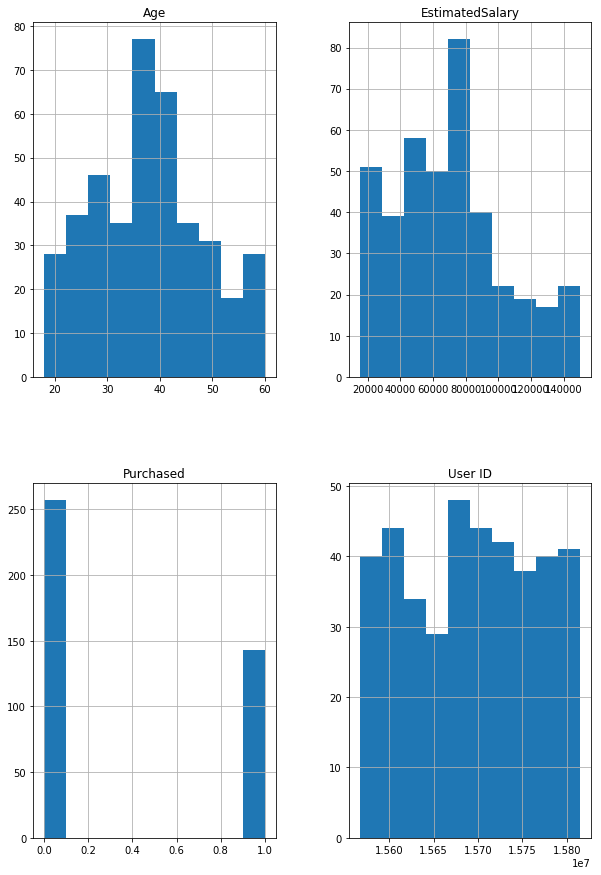

In [9]:
df.hist(figsize=(10,15))

In [10]:
df.skew()

User ID           -0.034513
Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

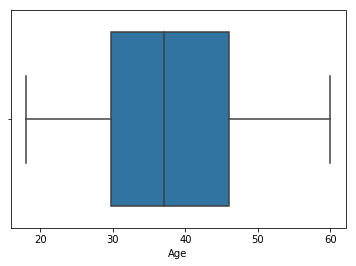

In [11]:
sns.boxplot(df['Age'])

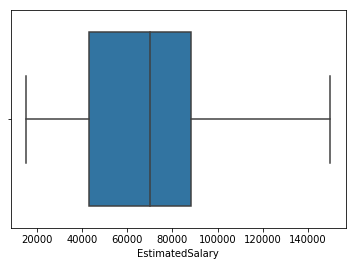

In [12]:
sns.boxplot(df['EstimatedSalary'])

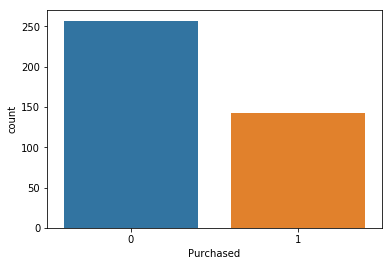

In [13]:
sns.countplot(df['Purchased'])

In [14]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

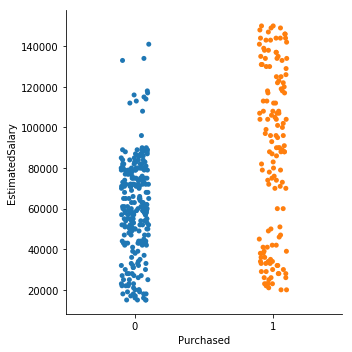

In [15]:
sns.catplot(x='Purchased',y='EstimatedSalary',data=df)

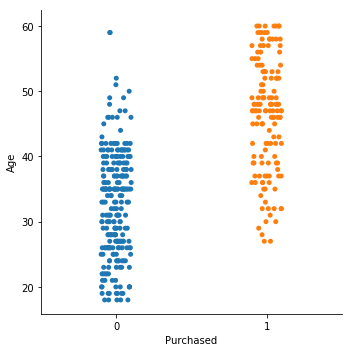

In [16]:
sns.catplot(x='Purchased',y='Age',data=df)

In [17]:
df.drop(['User ID'],axis=1,inplace=True)

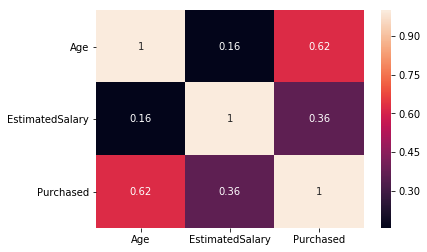

In [18]:
sns.heatmap(df.corr(),annot=True)

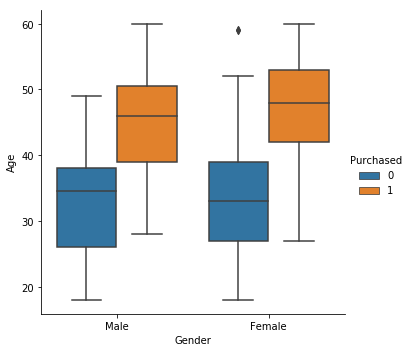

In [19]:
sns.catplot(x='Gender',y='Age',hue='Purchased',data=df,kind='box')

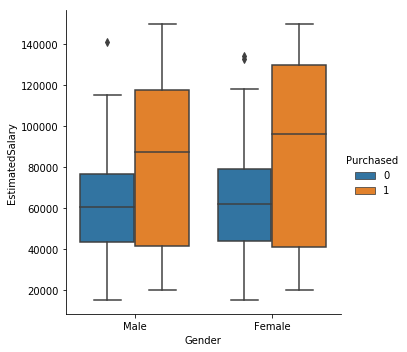

In [20]:
sns.catplot(x='Gender',y='EstimatedSalary',hue='Purchased',data=df,kind='box')

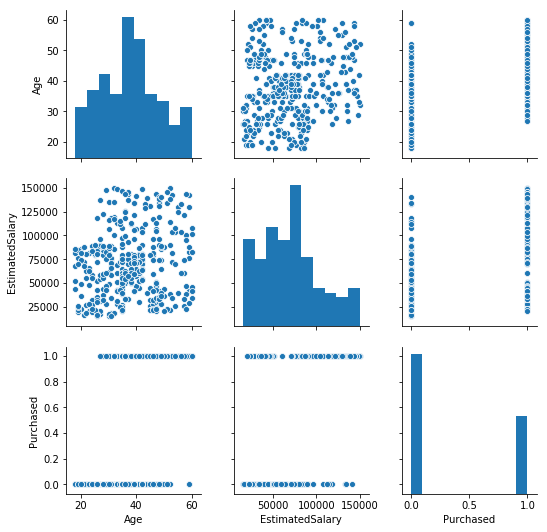

In [21]:
sns.pairplot(df)

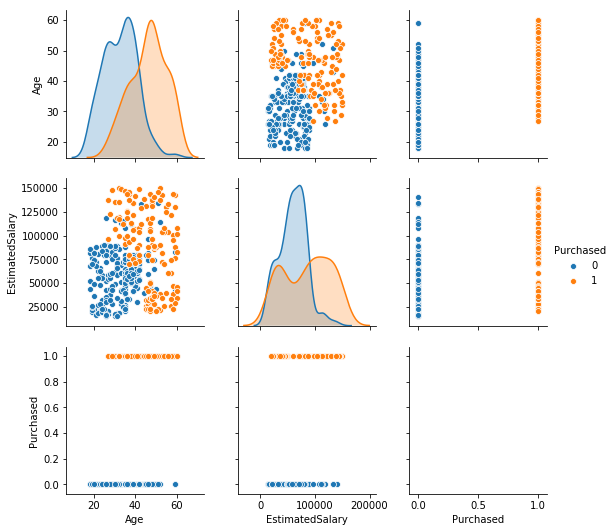

In [22]:
sns.pairplot(df,hue='Purchased')

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [24]:
x=df.iloc[:,:-1]
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [26]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=89,stratify=y)

In [28]:
print(x_train.shape,x_test.shape)

(280, 3) (120, 3)


In [29]:
print(y_train.shape,y_test.shape)

(280,) (120,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [31]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=150,random_state=6)
GBC=GradientBoostingClassifier(n_estimators=150,random_state=6)
ABC=AdaBoostClassifier(random_state=6)
ETC=ExtraTreesClassifier(random_state=6)

In [32]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score =  0.875


Cross_Val_Score =  0.8999624765478424


roc_auc_score =  0.861522198731501


classification_report
               precision    recall  f1-score   support

           0       0.90      0.91      0.90        77
           1       0.83      0.81      0.82        43

   micro avg       0.88      0.88      0.88       120
   macro avg       0.87      0.86      0.86       120
weighted avg       0.87      0.88      0.87       120



[[70  7]
 [ 8 35]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_stat

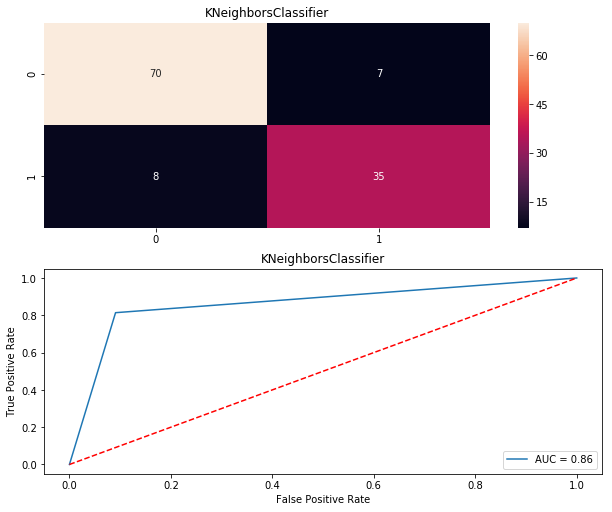

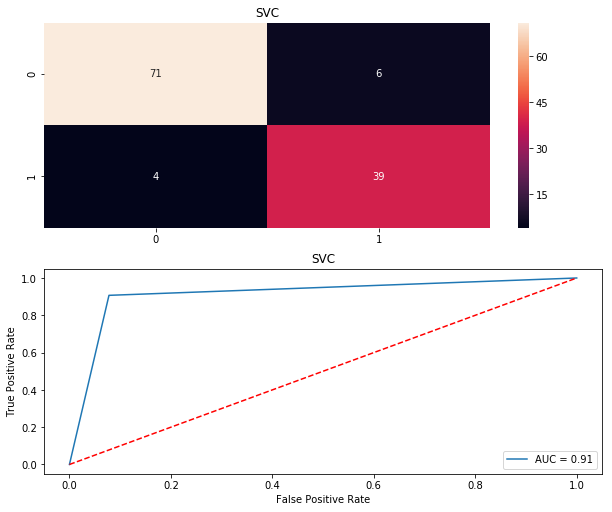

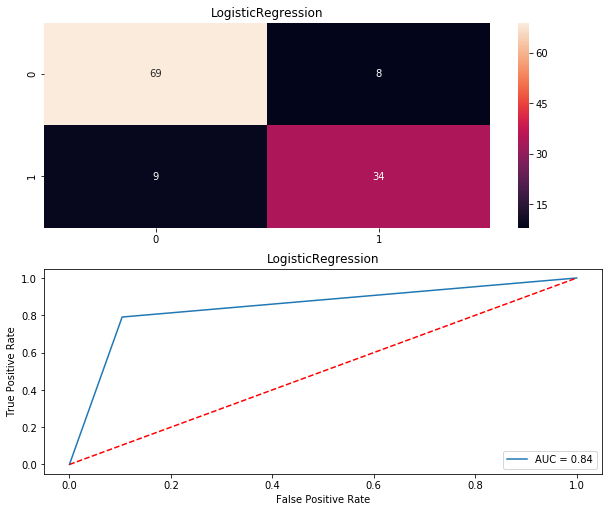

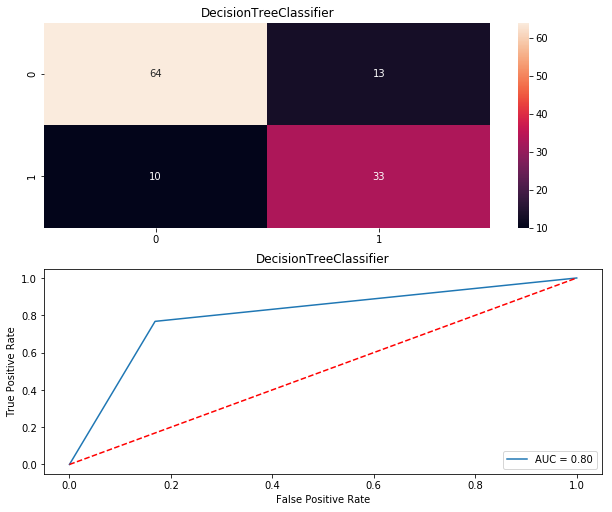

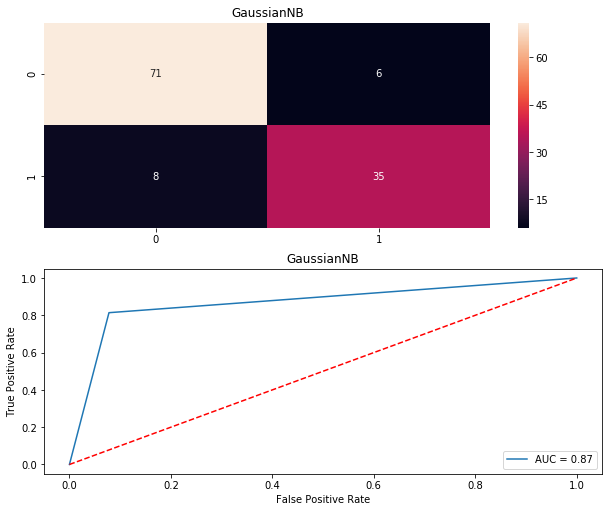

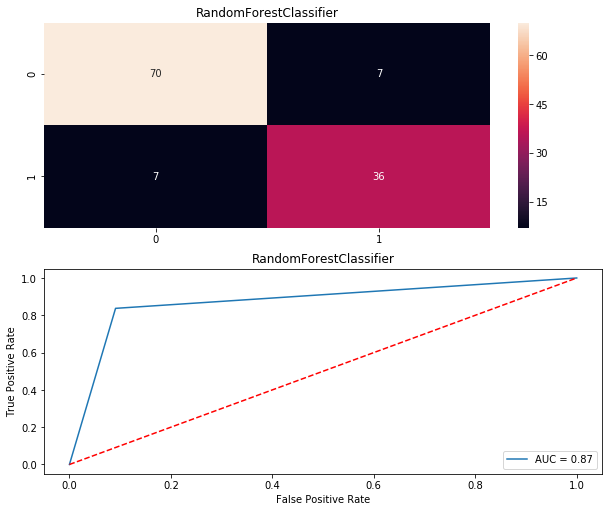

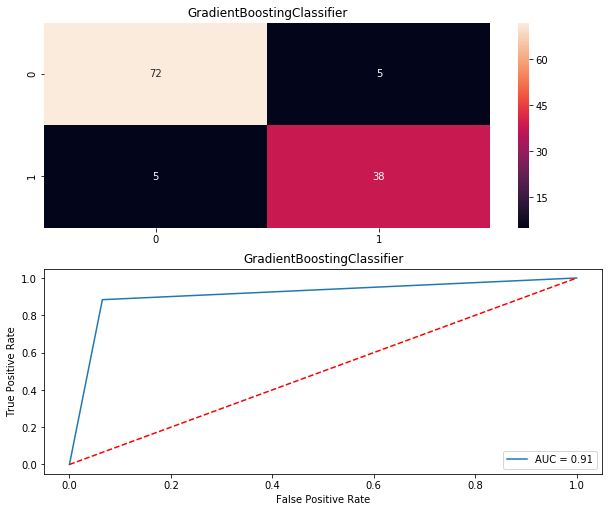

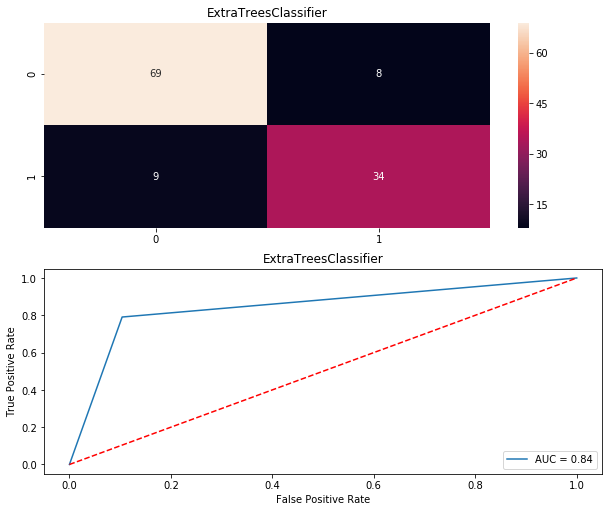

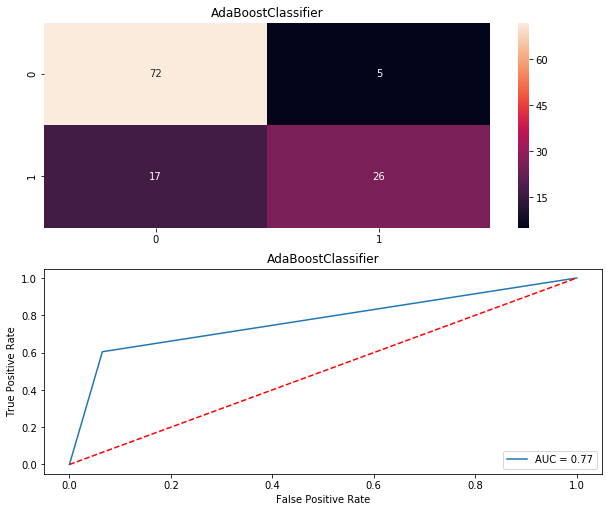

In [34]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    

In [35]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,87.500000,89.996248,86.152220
1,SVC,91.666667,90.715134,91.452733
2,LogisticRegression,85.833333,82.478737,84.340079
3,DecisionTreeClassifier,80.833333,82.455285,79.930535
4,GaussianNB,88.333333,87.506879,86.801571
5,RandomForestClassifier,88.333333,88.239212,87.315011
6,GradientBoostingClassifier,91.666667,87.007192,90.939293
7,ExtraTreesClassifier,85.833333,87.463571,84.340079
8,AdaBoostClassifier,81.666667,87.738274,76.985805


**I choose SupportVectorMachine as my final model because it perform very well on your dataset**

Accuracy_score = 91.666667

Cross_val_score = 90.715134

Roc_auc_curve = 91.452733

In [36]:
from sklearn.externals import joblib

In [37]:
joblib.dump(SV,'Model_SocialNetworkAds.csv')

['Model_SocialNetworkAds.csv']

In [38]:
model=joblib.load('Model_SocialNetworkAds.csv')

In [39]:
model.predict(x_test)

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)